In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("column_2C_weka.csv")

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


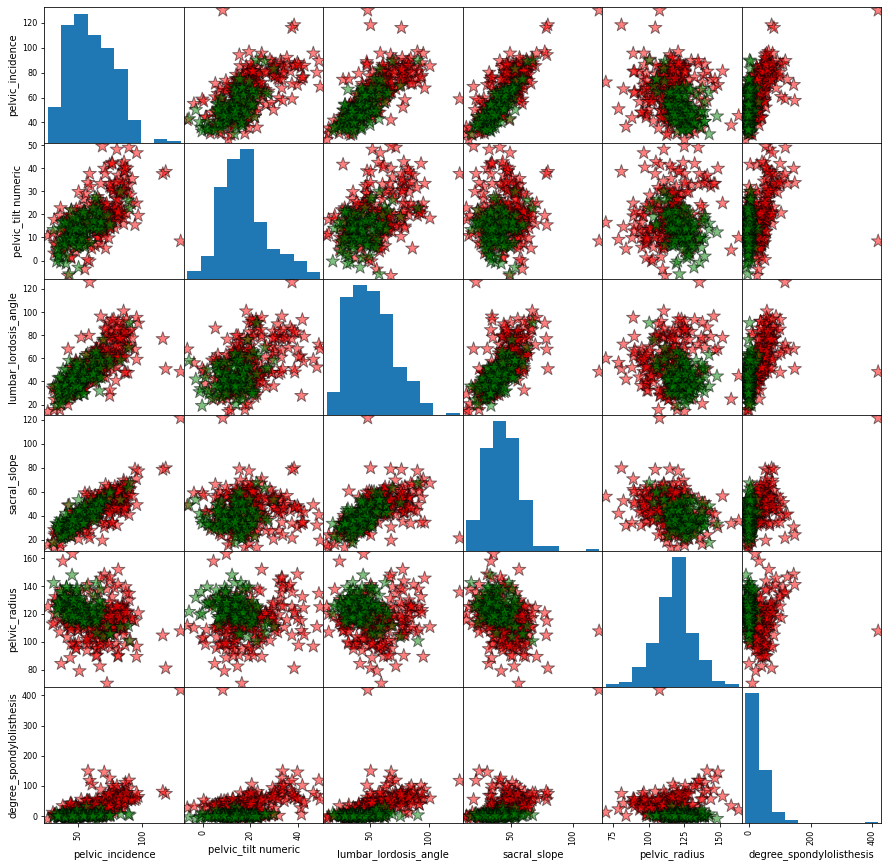

In [6]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

pd.plotting.scatter_matrix:

green: normal and red: abnormal

c: color

figsize: figure size

diagonal: histohram of each features

alpha: opacity

s: size of marker

marker: marker type

Yukarıdaki çıktıda, dağılım matrisinde görüldüğü gibi her özellik arasında ilişkiler var. Kaç tane normal(yeşil) ve 
anormal(kırmızı) sınıf olduğunu anlamak için, Searborn kütüphanesinde bulunan sınıfların sayısını sayan countplot() 
metodunu kullanabiliriz. Ayrıca value_counts() yöntemiyle yazdırabiliriz.

Abnormal    210
Normal      100
Name: class, dtype: int64

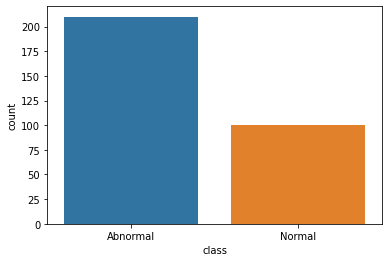

In [7]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

KNN algoritmasından biraz bahsedelim ve ardından koda dökelim.

KNN algoritması özellikle sınıflandırma işlemleri için kullanılmaktadır. Bu algoritma, bir veri noktasının
etrafındaki veri noktalarına bakarak o veri noktasının hangi sınıfa ait olduğunu belirler. 
Bunu şöyle yapar:
    -> Etrafındaki veri noktalarına öklid mesafesi bulunur. 
    -> Elde edilen mesafe değerleri bir listede saklanır.
    -> Liste içerisinden belirlenen k değeri adetinde en yakın mesafe değerleri seçilir.
    -> Seçilen değerlerden çoğunluk hangi sınıfta ise, sınıfını belirlemeye çalıştığımız veri noktamızda
       o sınıftadır.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

Yukarıdaki kodda farketmeniz gereken bir nokta var. Verileri x (özellikler) ile eğitiyoruz ve yine x (özellikler) ile tahmin ediyoruz. Bu oldukça mantıksız bir durum. O halde veriyi train ve test setlerine bölerek bu mantıksızlıktan kurtulabiliriz.

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8602150537634409


Şimdide k'nın farklı değerleri için sonucun nasıl değiştiğini inceleyelim.

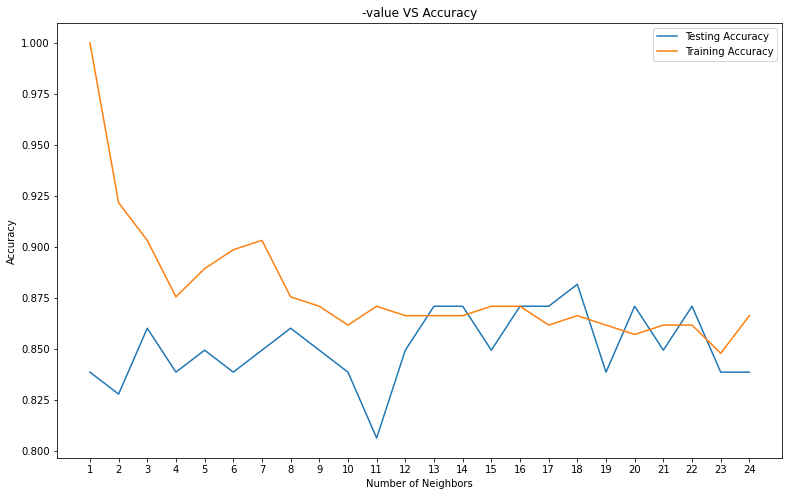

Best accuracy is 0.8817204301075269 with K = 18


In [10]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Eğer k değeri küçük ise model karmaşıktır ve bu durum modelin overfitting'e yol açabilmesi söz konusu. Bu durum, modelin train setlerini ezberlediği ve test setini iyi bir doğrulukla tahmin edemediği anlamına gelir. Eğer k değeri büyük ise daha az karmaşık olan model, underfit'e yol açabilir. 

Yukarıda, K'ya sırasıyla 1 ile 25 (dahil değil) arasında değerler veriliyor ve her K değeri için doğruluk elde ediliyor. Grafikte görebileceğiniz gibi, K=1 olduğunda train setlerini ezberler ve test setinde (overfit) iyi bir doğruluk verememektedir. Ayrıca K=18 ise, model underfit'e yol açar. Yine doğruluk yeterli değil. Bununla birlikte, K=18 olduğunda Doğruluk neredeyse %88 'tir ve en iyi performans elde edilmiştir. 

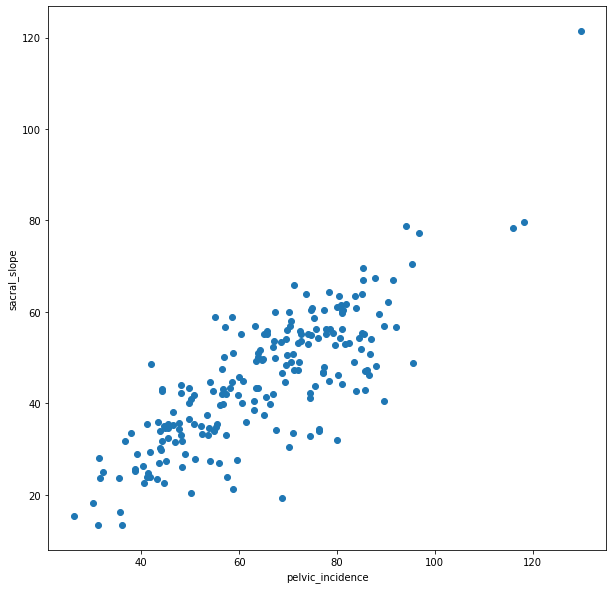

In [11]:
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

Şimdide Regresyon yapalım.

R^2 score:  0.6458410481075871


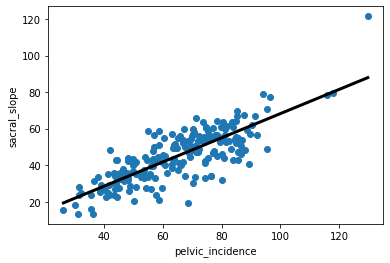

In [12]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

CROSS VALIDATION

Bildiğiniz gibi KNN yönteminde her seferinde tam olarak aynı bölünen random_state ile train test split kullanıyoruz. Ancak, random_state kullanmazsak, veriler her seferinde farklı bölünür ve bölme doğruluğuna göre farklı olacaktır. Dolayısıyla, model performansının train_test_split'e bağlı olduğu sonucuna varabiliriz. Örneğin, verileri 5 kez bölüp, fit edip ve tahmin ettik. Doğruluklar sırasıyla 0,89, 0,9, 0,91, 0,92 ve 0,93'tür. Hangi doğruluğu kullanacağımız meçhul ama çapraz doğrulama kullanırsak kabul edilebilir doğruluk bulabiliriz.

In [13]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.3931462502884869


Regularized Regression

Doğrusal regresyon, özelliklerden birinin önemli olduğunu düşünürse bu özelliğe yüksek katsayı verir. Ancak bu, KNN'de ezberlemeye benzer şekilde overfitting'e neden olabilir. Overfitting'i önlemek için büyük katsayıları cezalandıran düzenlileştirme kullanıyoruz.

Düzenlileştirme teknikleri: 

1-Ridge regression: L2 regularization olarak da adlandırılır.

Kayıp fonksiyonu = OLS + alpha * sum(parameter^2)

alpha, fit etmek ve tahmin etmek için seçmemiz gereken parametredir. Alpha seçimi, KNN'de K seçimine benzer. alpha, en iyi doğruluk ve model karmaşıklığı için seçmemiz gereken hiperparametredir. Bu işleme hiperparametre ayarlama denir.
Alpha sıfır ise, kayıp fonksiyon = OLS, yani lineer regression.
Alpha küçükse, overfitting'e neden olabilir
Alpha büyükse, underfitting'e neden olabilir.

2-Lasso regression: L1 regularization olarak da adlandırılır.

Kayıp fonksiyonu = OLS + alpha * sum(absolute_value(parameter))

Verilerin önemli özelliklerini seçmek için kullanılabilir.

Linear - Ridge - Lasso İlk izlenim: 
    Lineer Özellik Seçimi: 
        1.Lasso 
        2.Ridge Regresyon modeli: 
            1.Ridge 
            2.Lasso 
            3.Linear

In [14]:
# Ridge
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.5608287918841998


In [15]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9640334804327546
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]


Gördüğünüz gibi pelvik_incidence ve pelvik_tilt numeric önemli özelliklerdir ancak diğerleri önemli değildir

Şimdi doğruluğu inceleyelim.

In [16]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[60  6]
 [ 8 19]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.91      0.90        66
      Normal       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



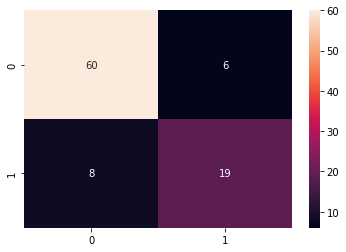

In [17]:
# visualize with seaborn library
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

ROC Curve with Logistic Regression

logistic regression çıktısı olasılıklardır.

Olasılık 0,5'ten büyükse, veri 1(anormal) olarak etiketlenir, aksi takdirde 0(normal) 'dir.

Varsayılan olarak lojistik regresyon eşiği 0,5'tir.

Bu eğride x ekseni false positive oran ve y ekseni true positive orandır.

Grafikteki eğri sol üst köşeye yakınsa, test daha doğrudur.

Roc eğrisi puanı, tahmin puanlarından eğrinin altındaki hesaplama alanı olan auc'tur.

auc'un 1'e yaklaşmasını isteriz.

fpr = False Positive Rate
tpr = True Positive Rate

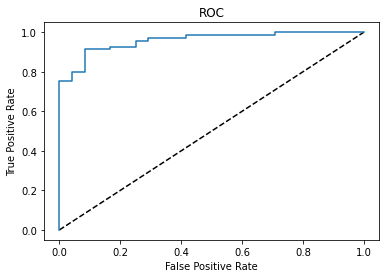

In [18]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

HYPERPARAMETER TUNING

KNN'deki gibi ayarlanması gereken hiperparametreler var.

Örneğin:
KNN'de k parametresi ayarlanmalıdır.
Ridge ve Lasso'da alpha parametresi ayarlanmalıdır.
max_depth gibi rastgele orman parametreleri ayarlanmalıdır.
linear regression parametreleri(katsayılar) ayarlanmalıdır.

Hiperparametre ayarı:

farklı parametrelerin tüm kombinasyonları denenir.

her biri fit edilir.

tahmin performansı ölçülür.

her birinin ne kadar iyi performans gösterdiği incelenir.

sonunda en iyi hiperparametreler seçilir.

KNN'de en iyi K değerini bulmak amacıyla for döngüsü oluşturmuştuk. 

Aslında tek ihtiyacımız olan GridSearchCV metodu.

grid: K=1'den 50(dahil değil)'ye kadar.

GridSearchCV knn ve grid alır ve grid araması yapar. Tüm hiperparametrelerin kombinasyonu anlamına gelir.

In [19]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 4}
Best score: 0.7559434901667911


2 hiper parametreli diğer grid search örneği:

İlk hiperparametre C: lojistik regresyon düzenleme parametresidir.

C yüksekse: overfit

C düşükse: underfit

İkinci hiperparametre, lineer regresyon kısmındaki gibi penalty(kayıp fonksiyon): l1 (Lasso) veya l2(Ridge).

PRE-PROCESSING DATA

Gerçek hayatta veriler, object veya categorical veriler içerebilir, bunları sklearn'de kullanmak için onları sayısal(numerical) verilere kodlamamız gerekir.

Verilerde, sınıf anormal ve normaldir. Bunları sayısal değere çevirelim.

class_Abnormal ve class_Normal isimleriyle 2 farklı özellik oluşturulmuştur.

Ancak yinelenen oldukları için sütunlardan birini bırakmamız gerekiyor.

In [20]:
# Load data
data = pd.read_csv('column_2C_weka.csv')
# get_dummies
df = pd.get_dummies(data)
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1,0
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,1,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1,0


get_dummies fonksiyonu her bir sınıfı 0 ve 1’lerle ifade ederek verinin tipini kategorik hale getirir.

In [21]:
# drop one of the feature
df.drop("class_Normal",axis = 1, inplace = True) 
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


Diğer ön işleme adımı centering(merkezleme), scaling(ölçekleme) veya normalizing(normalleştirme)'dir.

KNN'nin diğer bazı yöntemler gibi sınıflandırma için mesafe biçimini kullandığını fark etmişsinizdir. Bu nedenle, verileri ölçeklendirmemiz gerekiyor. Bu sebeple kullandığımız

standardization: ( x - x.mean) / x.variance or x - x.min / x.range

pipeline: Boru hattının amacı, svm (sınıflandırıcı) ve standardization (ön işleme) gibi birkaç adımı bir araya getirmektir.

Parametre adını nasıl oluşturuyoruz: örneğin SVM_ _C : stepName__parameterName

Ardından en iyi parametreleri bulmak için grid search yapalım.

In [22]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}
